In [1]:
!rm -rf /content/CFD_unet
!git clone https://github.com/SergeyAnufriev/CFD_unet.git

Cloning into 'CFD_unet'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (312/312), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 312 (delta 93), reused 309 (delta 93), pack-reused 0
Receiving objects: 100% (312/312), 40.70 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (452/452), done.


In [2]:
import pandas as pd
import glob

In [3]:
files_c = glob.glob(r'/content/CFD_unet/dataset/*_c.txt')
files_n = glob.glob(r'/content/CFD_unet/dataset/*_n.txt')

In [4]:
def read_file_n(dir_):
  df = pd.read_csv(dir_,sep =' ',header=None)
  df = df.drop(labels=list(range(1, 15, 2)),axis=1)
  df.columns = ['node_num','node_type','x','y','P','u_x','u_y','cav']
  df = df.astype({"P": float, "cav": float})

  return df


In [5]:
df = read_file_n(files_n[17])

In [6]:
files_n[7]

'/content/CFD_unet/dataset/116ah93w174_193_50_11594_459_146_n.txt'

In [7]:
df.head()

,node_num,node_type,x,y,P,u_x,u_y,cav
0,0,2,0.115,0.000182,42400.0,0.00000,0.000000,1.0
1,1,1,0.500,0.250000,42400.0,1.94752,-0.455176,1.0
2,2,1,0.500,-0.250000,42400.0,1.94752,-0.455176,1.0
3,3,3,-0.500,-0.250000,42400.0,1.94752,-0.455176,1.0
4,4,3,-0.500,0.250000,42400.0,1.94752,-0.455176,1.0


In [ ]:
df['cav'].value_counts()

1.0    7420
Name: cav, dtype: int64

In [ ]:
len(df['P'].value_counts())

1

In [ ]:
flies_repeat = []

count = 0
for file_ in files_n:
  df = read_file_n(file_)
  if len(df['P'].value_counts()) ==1:
    count+=1
    flies_repeat.append(file_.split('/')[-1])

In [ ]:
flies_repeat

['17ag12_196_-39_13723_566_-114_n.txt',
 '12e591_196_-36_16594_709_-104_n.txt',
 '14e343_196_-35_11131_436_-102_n.txt',
 '24naca0015_199_-17_10813_420_-49_n.txt',
 '31ag16_198_24_12342_497_68_n.txt',
 '126e379_198_25_14836_621_72_n.txt',
 '80e178_194_-45_17719_765_-131_n.txt',
 '27e544_195_-42_11879_473_-122_n.txt',
 '122e562_198_-22_11051_432_-65_n.txt',
 '46c5a_198_-22_12317_495_-65_n.txt',
 '3e387_198_-20_11678_463_-58_n.txt',
 '52arad20_194_-44_17170_738_-128_n.txt',
 '115ah81131_195_-41_12098_484_-120_n.txt',
 '117e377_198_23_14434_601_66_n.txt',
 '107e1213_195_-43_17121_736_-126_n.txt',
 '95clarym15_198_27_15667_663_77_n.txt',
 '116ah93w174_193_50_11594_459_146_n.txt',
 '96e182_194_-48_17822_771_-138_n.txt',
 '124b737a_196_-37_16131_686_-108_n.txt',
 '68e377_198_-23_10953_427_-68_n.txt',
 '108e668_195_42_10538_406_123_n.txt',
 '111dae21_194_47_11680_464_137_n.txt',
 '65e205_198_-25_11571_458_-74_n.txt',
 '127atr72sm_199_-17_11176_438_-51_n.txt',
 '128ag16_194_-45_11954_477_-131_n

In [ ]:
count

68

In [ ]:
len(files_n)

149

In [ ]:
68/149

0.4563758389261745

In [ ]:
files_n[7]

'/content/gdrive/MyDrive/cfd_data_mesh/27e544_195_-42_11879_473_-122_n.txt'

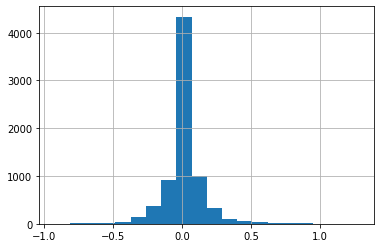

In [ ]:
df['u_y'].hist(bins=20)

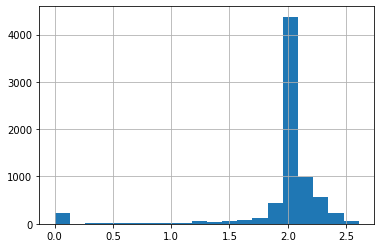

In [ ]:
df['u_x'].hist(bins=20)

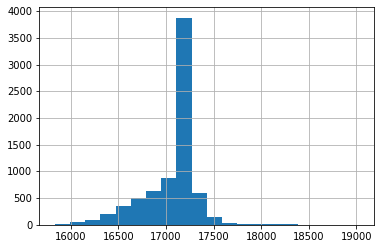

In [ ]:
df['P'].hist(bins=20)